<a href="https://colab.research.google.com/github/Karishma-Kuria/CMPE-255-Gradient-Bost-Techniques/blob/main/Gradient_Boost_Regression_Techniques_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Gradient boost regression techniques using XGBoost, Catboost, LightGBM**

## **Catboost**

In [52]:
# Installing Catboost
!pip install catboost

In [53]:
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
import shapely
from sklearn import datasets
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Loading the dataset
boston_df= datasets.load_boston()
boston_df = pd.DataFrame(boston_df.data, columns=boston_df.feature_names)
boston_df.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

(506, 13)

### Checking for any null value in dataset

In [54]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [55]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Training

Now, we will split the dataset into 80% Training and 20% test.
And the target variable is ‘MEDV’ — which is the Median value of owner-occupied homes in $1000's.

In [56]:
X, y = datasets.load_boston(return_X_y=True)
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size = 0.2, random_state=5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

To train and optimize our model, we will now combine the features and target variables into test and train dataset as shown below.

In [57]:
train_ds = cb.Pool(X_trainset, y_trainset) 
test_ds = cb.Pool(X_testset, y_testset)

## Now we will apply catboost regression model.

In [58]:
# Since this is a regression task will Use RMSE measure as our loss function.
catboost_model = cb.CatBoostRegressor(loss_function='RMSE')

# Here we are using following parameters: learning rate,number of iterations, 
# L2 leaf regularization, and tree depth

grid_value = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
catboost_model.grid_search(grid_value, train_ds)

Streaming output truncated to the last 5000 lines.
61:	learn: 1.9302535	test: 2.1337971	best: 2.1337971 (61)	total: 152ms	remaining: 339ms
62:	learn: 1.9141415	test: 2.1272391	best: 2.1272391 (62)	total: 154ms	remaining: 336ms
63:	learn: 1.8920256	test: 2.1258090	best: 2.1258090 (63)	total: 156ms	remaining: 332ms
64:	learn: 1.8703215	test: 2.1147848	best: 2.1147848 (64)	total: 158ms	remaining: 329ms
65:	learn: 1.8519417	test: 2.1095553	best: 2.1095553 (65)	total: 160ms	remaining: 325ms
66:	learn: 1.8275234	test: 2.1021215	best: 2.1021215 (66)	total: 162ms	remaining: 322ms
67:	learn: 1.8099435	test: 2.0959270	best: 2.0959270 (67)	total: 164ms	remaining: 319ms
68:	learn: 1.7923768	test: 2.0943540	best: 2.0943540 (68)	total: 166ms	remaining: 316ms
69:	learn: 1.7815164	test: 2.0940778	best: 2.0940778 (69)	total: 168ms	remaining: 312ms
70:	learn: 1.7525400	test: 2.0939138	best: 2.0939138 (70)	total: 170ms	remaining: 309ms
71:	learn: 1.7307144	test: 2.0899461	best: 2.0899461 (71)	total: 172m

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

## Model Evaluation

In [59]:
#  Evaluating the performance if the model
prediction = catboost_model.predict(X_testset)
rmse = (np.sqrt(mean_squared_error(y_testset, prediction)))
r2 = r2_score(y_testset, prediction)
print("Performance Evaluation")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Performance Evaluation
RMSE: 2.83
R2: 0.90


From the above data, we can infer that the model achieved an R-Square of 90% which is pretty good taken into consideration the less work done on feature engineering.

## Plotting Model

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


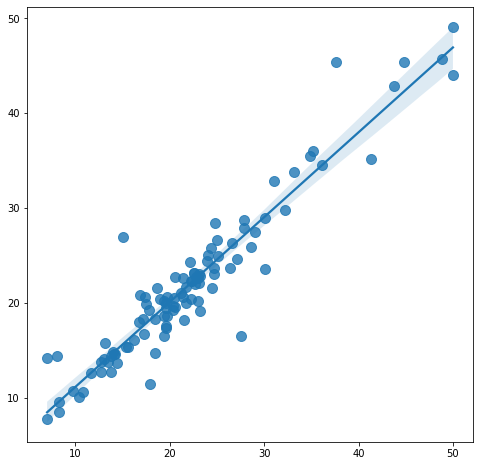

In [60]:
plt.figure(figsize=(8,8))
sns.regplot(y_testset, prediction, fit_reg=True, scatter_kws={"s": 100})

## **Light GBM**

Since the data loading and test and train data building part is already done above.
Here we will be applying LightGBMRegressor on the same dataset.

In [61]:
import lightgbm as ltb
lightgbm_model = ltb.LGBMRegressor()
lightgbm_model.fit(X_trainset, y_trainset)

expected_y_value  = y_testset
predicted_y_value = lightgbm_model.predict(X_testset)

rmse = (np.sqrt(mean_squared_error(expected_y_value, predicted_y_value)))
r2 = r2_score(expected_y_value, predicted_y_value)

print("Performance Evaluation")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Performance Evaluation
RMSE: 3.30
R2: 0.86


From the above data, we can infer that the model achieved an R-Square of 86% which is less than that of catboost.

## Plotting Model

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


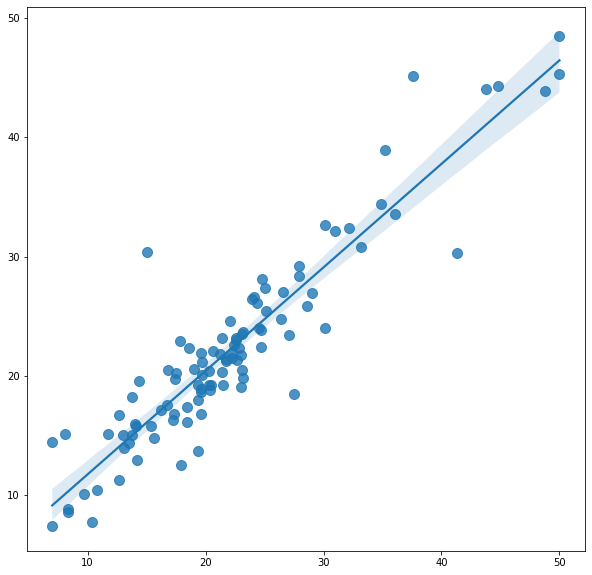

In [62]:
plt.figure(figsize=(10,10))
sns.regplot(expected_y_value, predicted_y_value, fit_reg=True, scatter_kws={"s": 100})

## XGBoost

Same dataset will be used in this technique as above.

In [63]:
from xgboost import XGBRegressor
# Since the dataset splitting part is done before, we will continue with the model building steps.

# Defining model
xgbregressor_model = XGBRegressor()
xgbregressor_model.fit(X_trainset, y_trainset)

# Making prediction
predicted_y_value = xgbregressor_model.predict(X_testset)
# summarize prediction
predicted_y_value
rmse = (np.sqrt(mean_squared_error(y_testset, predicted_y_value)))
r2 = r2_score(y_testset, predicted_y_value)

print("Performance Evaluation")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

[12:28:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Performance Evaluation
RMSE: 3.04
R2: 0.88


This models gives an R-Square of 88%. WHich is better than LightgbmBoost.

## Plotting Model

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


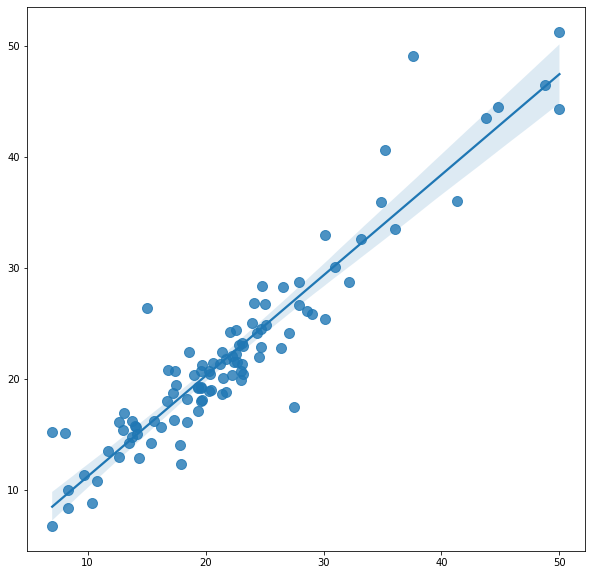

In [64]:
plt.figure(figsize=(10,10))
sns.regplot(expected_y_value, predicted_y_value, fit_reg=True, scatter_kws={"s": 100})